In [ ]:
###Ml-assignment3-fractal3-Chart Image Classification using CNN-m22ai608###

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Define the paths to your image and csv folders
train = "C:\\Users\\Admin\\Downloads\\train_val"
test = "C:\\Users\\Admin\\Downloads\\test"


In [3]:
train_labels = pd.read_csv("C:\\Users\\Admin\\Downloads\\train_val.csv")

In [4]:
train_labels

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical
...,...,...
995,995,dot_line
996,996,dot_line
997,997,dot_line
998,998,dot_line


In [6]:
#loading trainingdata
images=[]
labels=[]

for filename in os.listdir(train):
    if filename.endswith('.png'):
        img=cv2.imread(os.path.join(train, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        images.append(img_array)
        labels.append(filename)

In [7]:
#string labels to numerical labels
le_enc = LabelEncoder()
labels = le_enc.fit_transform(labels)

In [8]:
images = np.array(images)
labels = np.array(labels)
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy') 
y_train = np.load('y_train.npy') 


In [9]:
x_train[:5]
y_train[:5]


array([0, 1, 2, 3, 4], dtype=int64)

In [11]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test):
	if filename.endswith('.png'):
		img = cv2.imread(os.path.join(test, filename))
		img = cv2.resize(img, (128, 128))
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
		img_array = np.array(img)
		images.append(img_array)
		labels.append(filename)
        
le_enc = LabelEncoder()
labels = le_enc.fit_transform(labels)


In [12]:
# lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy') 

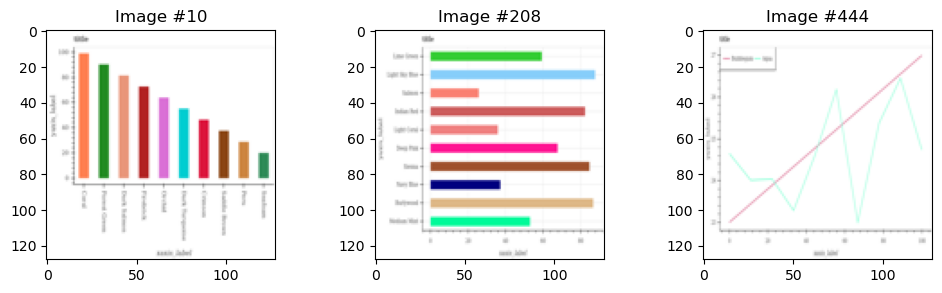

In [13]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(x_train[10])
plt.title("Image #10")

plt.subplot(1, 3, 2)
plt.imshow(x_train[208])
plt.title("Image #208")

plt.subplot(1, 3, 3)
plt.imshow(x_train[444])
plt.title("Image #444")

plt.tight_layout()
plt.show()


In [15]:
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_labels['type']])
print(y_train.shape)
print(y_test.shape)



(1000,)
(50,)


In [16]:
def image_sample(x, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(x[index])
    plt.xlabel(image_classes[y[index]])


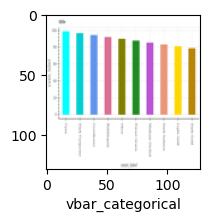

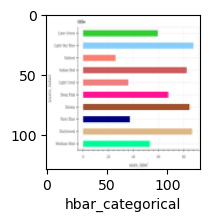

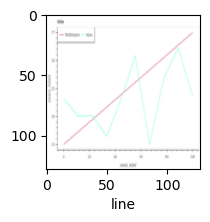

In [18]:
# Display the first image in the training dataset
image_sample(x_train, y_train, 0)

# Display the 208th image in the training dataset
image_sample(x_train, y_train, 208)

# Display the 444th image in the training dataset
image_sample(x_train, y_train, 444)



In [19]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [20]:
x_test.shape

(1000, 128, 128, 3)

In [22]:
# Get the image indices and labels from the CSV file
y_train_index = train_labels['image_index']
y_train_type = train_labels['type']


In [23]:
y_train_type[:5]


0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [24]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
32/32 [==============================] - 40s 1s/step - loss: 7.5115 - accuracy: 0.1850
Epoch 2/10
32/32 [==============================] - 34s 1s/step - loss: 1.6133 - accuracy: 0.2080
Epoch 3/10
32/32 [==============================] - 33s 1s/step - loss: 1.6083 - accuracy: 0.2300
Epoch 4/10
32/32 [==============================] - 34s 1s/step - loss: 1.5996 - accuracy: 0.2340
Epoch 5/10
32/32 [==============================] - 33s 1s/step - loss: 1.5962 - accuracy: 0.2380
Epoch 6/10
32/32 [==============================] - 34s 1s/step - loss: 1.5938 - accuracy: 0.2490
Epoch 7/10
32/32 [==============================] - 34s 1s/step - loss: 1.5982 - accuracy: 0.2610
Epoch 8/10
32/32 [==============================] - 34s 1s/step - loss: 1.5601 - accuracy: 0.2620
Epoch 9/10
32/32 [==============================] - 33s 1s/step - loss: 1.5829 - accuracy: 0.2610
Epoch 10/10
32/32 [==============================] - 34s 1s/step - loss: 1.5835 - accuracy: 0.2500


In [28]:

# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [29]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 2s 223ms/step - loss: 1.6085 - accuracy: 0.2000


[1.6084932088851929, 0.20000000298023224]

In [30]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert predicted probabilities to predicted class labels
y_pred_classes = [np.argmax(pred) for pred in y_pred]



5/5 [==============================] - 1s 220ms/step


In [43]:
#  accuracy is very low here

In [31]:
# Print the shapes of the arrays
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)



Train Images Shape: (640, 128, 128, 3)
Train Labels Shape: (640,)
Test Images Shape: (160, 128, 128, 3)
Test Labels Shape: (160,)


Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 1.6184 - accuracy: 0.2094 - val_loss: 1.6738 - val_accuracy: 0.1750
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 1.6430 - accuracy: 0.2188 - val_loss: 1.5827 - val_accuracy: 0.2250
Epoch 3/50
1/1 [==============================] - 7s 7s/step - loss: 1.5693 - accuracy: 0.2359 - val_loss: 1.5233 - val_accuracy: 0.4313
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 1.5166 - accuracy: 0.4391 - val_loss: 1.4730 - val_accuracy: 0.3375
Epoch 5/50
1/1 [==============================] - 6s 6s/step - loss: 1.4558 - accuracy: 0.3641 - val_loss: 1.4119 - val_accuracy: 0.3875
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 1.3790 - accuracy: 0.4281 - val_loss: 1.3580 - val_accuracy: 0.5063
Epoch 7/50
1/1 [==============================] - 8s 8s/step - loss: 1.3107 - accuracy: 0.5641 - val_loss: 1.2856 - val_accuracy: 0.5125
Epoch 8/50
1/1 [=======================

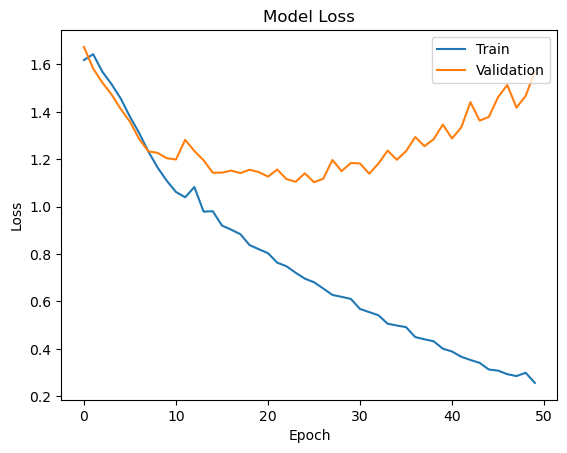

In [35]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


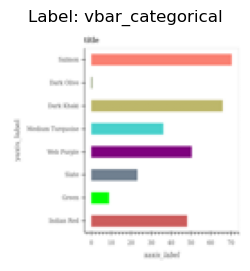

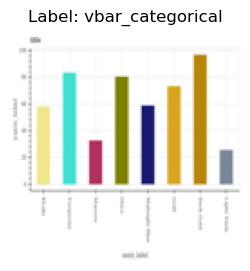

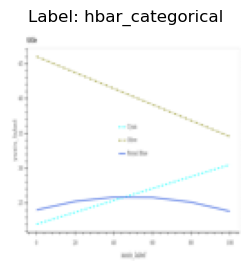

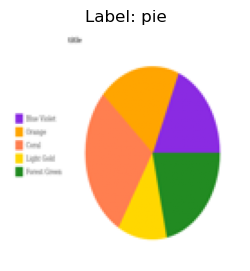

In [36]:
def image_sample(x, y, index):
    """
    Displays the image and corresponding label at the given index.

    Parameters:
    x (numpy array): The input image array
    y (numpy array): The corresponding label array
    index (int): The index of the image to display
    """
    plt.figure(figsize=(3,3))
    plt.imshow(x[index])
    plt.axis('off')
    plt.title(f"Label: {image_classes[y[index]]}")
    plt.show()

# Display some sample images from the test set
image_sample(x_test, y_test, 1)
image_sample(x_test, y_test, 50)
image_sample(x_test, y_test, 25)
image_sample(x_test, y_test, 30)


In [37]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]


5/5 [==============================] - 1s 107ms/step


array([[2.7861651e-09, 1.1974514e-12, 4.8529721e-05, 3.3449049e-12,
        9.9995148e-01],
       [1.4973733e-03, 3.3018044e-03, 2.5676417e-01, 6.6524071e-01,
        7.3195972e-02],
       [7.0221624e-08, 2.6501276e-08, 4.5196405e-01, 5.4803556e-01,
        4.0907815e-07],
       [2.2477834e-01, 1.2834758e-01, 4.0887743e-03, 1.2384683e-03,
        6.4154679e-01],
       [6.7453492e-01, 4.3741733e-02, 2.8982155e-02, 1.9464964e-03,
        2.5079471e-01]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 3, 3, 4, 0]

In [39]:
y_test[:5]

array([4, 3, 2, 4, 4])

In [40]:
# here we see some values are not matching

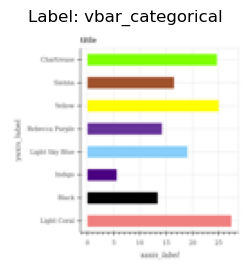

Predicted class: vbar_categorical


In [41]:
image_sample(x_test, y_test, 15) # Show the actual image
print("Predicted class:", image_classes[y_classes[15]]) # Print the predicted class

In [44]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.63      0.68      0.65        40
           1       0.70      0.88      0.78        26
           2       0.45      0.32      0.38        31
           3       0.65      0.49      0.56        35
           4       0.64      0.82      0.72        28

    accuracy                           0.62       160
   macro avg       0.61      0.64      0.62       160
weighted avg       0.61      0.62      0.61       160



In [45]:
# Generate the confusion matrix 
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)


Confusion Matrix:
[[27  3  4  0  6]
 [ 1 23  0  2  0]
 [11  2 10  7  1]
 [ 3  1  8 17  6]
 [ 1  4  0  0 23]]


Text(95.72222222222221, 0.5, 'Actual')

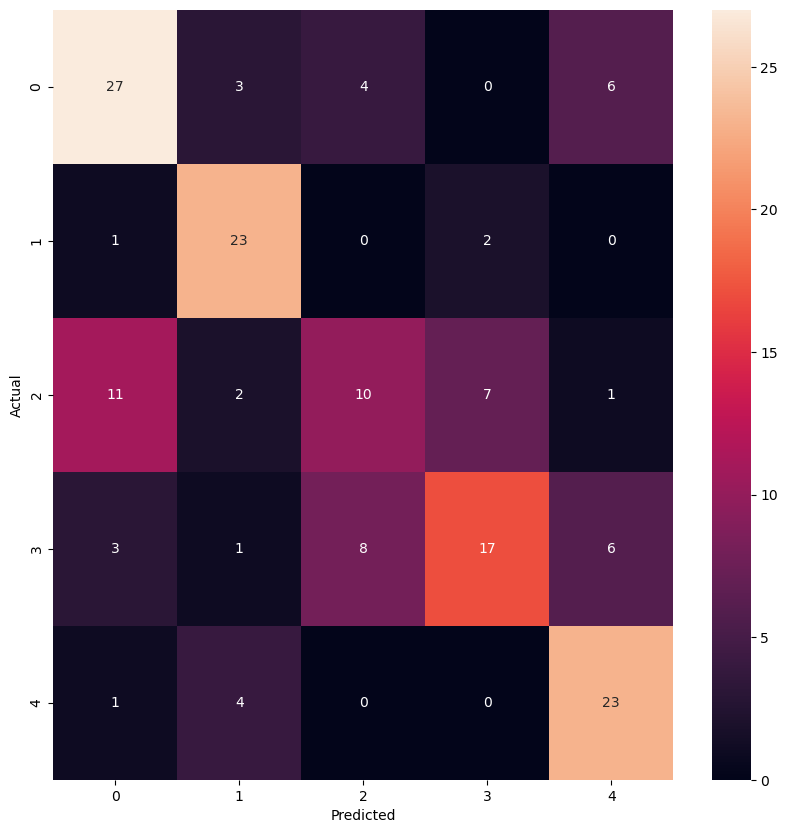

In [46]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [49]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [52]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


In [54]:
# Freezing weights
for layer in pt_model.layers:
 layer.trainable = False


In [55]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:

# Print the summary of the model architecture
pt_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   